## oneday quiz 
## 1.Sklearn을 이용해서 iris 데이터를 읽어서 pandas dataframe에 저장한 결과

In [308]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## quiz 2. Plotly express를 이용해서 네 개의 특성을 한 그래프에 boxplot으로 그린 결과

In [309]:
import plotly.express as px
import numpy as np


px.box(iris_pd, title="Box Plot iris", labels={'variable': 'Columns'}, points= 'all')

In [74]:
px.box(iris_pd, x='species', y=iris.feature_names, points='all')

## 3. Standard Scaler를 적용한 데이터를 또 다른 pandas dataframe에 저장한 결과

In [93]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(iris_pd)
std_scaled_pd = pd.DataFrame(std_scaled, columns=iris_pd.columns)
std_scaled_pd['species'] = iris.target
std_scaled_pd.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## 4. Standard Scaler를 적용한 데이터의 네 개의 특성을 한 그래프에 boxplot을 그려주세요. 이때 plotly express를 사용

In [90]:

px.box(std_scaled_pd, title="Box Plot iris", labels={'variable': 'Columns'}, points= 'all')


In [82]:

px.box(std_scaled_pd, x='species', y=iris.feature_names, points='all')


## 5. Standard Scaler를 적용한 데이터를 8:2로 train, test 데이터로 나눈 결과

In [94]:
from sklearn.model_selection import train_test_split

X = std_scaled_pd.drop(['species'], axis=1)
y = std_scaled_pd['species']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


## 6.  RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, kNN 모델들을 이용해서 분류학습

In [190]:
# 분류기 추정기
rf = RandomForestClassifier(n_estimators = 50, max_depth= 2)
dt = DecisionTreeClassifier(max_depth= 3, random_state=13)
lr = LogisticRegression(solver='liblinear', random_state=13)
knn = KNeighborsClassifier(n_neighbors=2, n_jobs = -1)


In [193]:
#훈련
rf.fit(X_train, y_train)

rf_train_predict = rf.predict(X_train)
rf_test_predict = rf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_predict)
rf_test_accuracy = accuracy_score(y_test, rf_test_predict)

print('random forest train accuracy : ', rf_train_accuracy)
print('random forest test accuracy : ', rf_test_accuracy)

random forest train accuracy :  0.9583333333333334
random forest test accuracy :  0.9666666666666667


In [191]:
dt.fit(X_train, y_train)

dt_train_predict = dt.predict(X_train)
dt_test_predict = dt.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_predict)
dt_test_accuracy = accuracy_score(y_test, dt_test_predict)

print('Decision tree train accuracy : ', dt_train_accuracy)
print('Decision tree test accuracy : ', dt_test_accuracy)


Decision tree train accuracy :  0.975
Decision tree test accuracy :  0.9333333333333333


In [182]:
lr.fit(X_train, y_train)

lr_train_predict = lr.predict(X_train)
lr_test_predict = lr.predict(X_test)

lr_train_accuracy = accuracy_score(y_train, lr_train_predict)
lr_test_accuracy = accuracy_score(y_test, lr_test_predict)

print('logistic regression train accuracy : ', lr_train_accuracy)
print('logistic regression test accuracy : ', lr_test_accuracy)

logistic regression train accuracy :  0.925
logistic regression test accuracy :  0.9333333333333333


In [183]:
knn.fit(X_train, y_train)

knn_train_predict = knn.predict(X_train)
knn_test_predict = knn.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, knn_train_predict)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)

print('knn train accuracy : ', knn_train_accuracy)
print('knn test accuracy : ', knn_test_accuracy)



knn train accuracy :  0.9666666666666667
knn test accuracy :  0.9333333333333333


## 7. train 데이터와 test 데이터의 accuracy를 모델별로 pandas dataframe에 정리

In [209]:
import pandas as pd

accuracy_list = [[knn_test_accuracy, knn_train_accuracy],
                 [rf_test_accuracy, rf_train_accuracy],
                 [lr_test_accuracy, lr_train_accuracy],
                 [dt_test_accuracy, dt_train_accuracy]
                ]
columns = ['test', 'train']
index = ['knn', 'rf', 'lr', 'dt']

accuracy_pd = pd.DataFrame(accuracy_list, index=index, columns=columns)
accuracy_pd


,test,train
knn,0.933333,0.966667
rf,0.966667,0.958333
lr,0.933333,0.925000
dt,0.933333,0.975000


## 8. 6번의 상황에서 5겹 kFold해서 cross validation score를 계산해서, 각 모델별로 각 score의 평균과 표준편차를 제시

In [213]:
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)

score_rf = cross_val_score(rf, X_train, y_train, cv=kfold)
score_dt = cross_val_score(dt, X_train, y_train, cv=kfold)
score_knn = cross_val_score(knn, X_train, y_train, cv=kfold)
score_lr = cross_val_score(lr, X_train, y_train, cv=kfold)

In [217]:
print('n_splits={}, cross validation score: {}'.format(5, score_rf))
print('n_splits={}, cross validation score: {}'.format(5, score_dt))
print('n_splits={}, cross validation score: {}'.format(5, score_knn))
print('n_splits={}, cross validation score: {}'.format(5, score_lr))

n_splits=5, cross validation score: [0.91666667 0.91666667 0.95833333 0.95833333 0.95833333]
n_splits=5, cross validation score: [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
n_splits=5, cross validation score: [0.91666667 0.91666667 0.83333333 0.95833333 0.91666667]
n_splits=5, cross validation score: [0.875      0.83333333 0.91666667 0.83333333 0.91666667]


In [238]:

all_list = [score_rf, score_dt, score_knn, score_lr]
avg_list = []
var_list = []
std_list = []

for scores in all_list:
    avg = np.mean(scores)
    var = np.var(scores)
    std = np.std(scores)

    avg_list.append(avg)
    var_list.append(var)
    std_list.append(std)

print("Average:", avg_list)
print("Variance:", var_list)
print("Standard Deviation:", std_list)

Average: [0.9416666666666667, 0.9583333333333334, 0.9083333333333334, 0.875]
Variance: [0.00041666666666666816, 0.0, 0.001666666666666666, 0.0013888888888888863]
Standard Deviation: [0.020412414523193187, 0.0, 0.04082482904638629, 0.03726779962499646]


In [239]:
import pandas as pd

models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

avg_list = []
std_list = []

for scores in all_list:
    avg_list.append(np.mean(scores))
    std_list.append(np.std(scores))

summary_df = pd.DataFrame({'Model': models, 'Average': avg_list, 'Standard Deviation': std_list})
summary_df.set_index('Model', inplace=True) 

print(summary_df)


                      Average  Standard Deviation
Model                                            
Random Forest        0.941667            0.020412
Decision Tree        0.958333            0.000000
KNN                  0.908333            0.040825
Logistic Regression  0.875000            0.037268


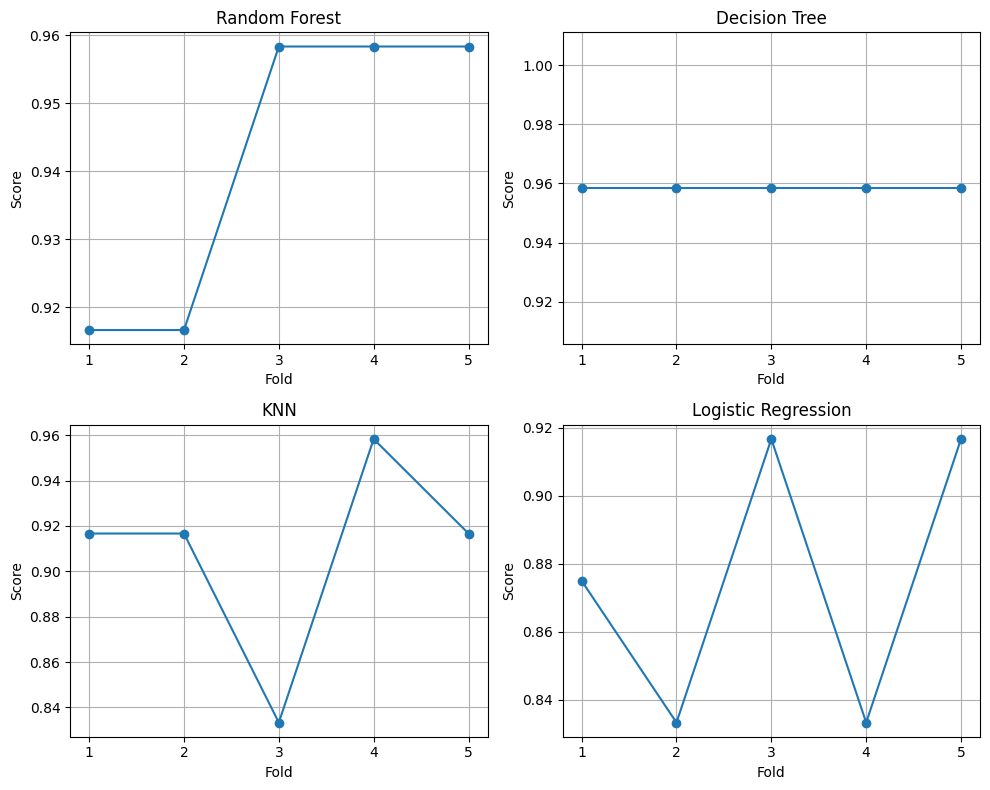

In [219]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']
cross_val_scores = [score_rf, score_dt, score_knn, score_lr]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  

for i, (model, scores) in enumerate(zip(models, cross_val_scores)):
    axs[i].plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    axs[i].set_title(model)
    axs[i].set_xlabel('Fold')
    axs[i].set_ylabel('Score')
    axs[i].set_xticks(range(1, len(scores) + 1)) 
    axs[i].grid(True)  

plt.tight_layout()
plt.show()


## 9. 8번의 상황에서 각 모델별 cv score를 boxplot으로 그려서 비교해주세요. 

In [307]:
import plotly.graph_objects as go
# import seaborn as sns
# import matplotlib.pyplot as plt

# models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']
# cross_val_scores = [score_rf, score_dt, score_knn, score_lr]

# # Boxplot 생성
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=cross_val_scores)
# plt.xticks(range(len(models)), models) 
# plt.title('Cross Validation Scores by Model')
# plt.ylabel('Score')
# plt.grid(True)  
# plt.show()

import plotly.graph_objects as go

models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']
cross_val_scores = [score_rf, score_dt, score_knn, score_lr]

fig = go.Figure()

for model, scores in zip(models, cross_val_scores):
    fig.add_trace(go.Box(y=scores, name=model))

fig.update_layout(title='Cross Validation Scores by Model', yaxis_title='Cross Validation Score')

fig.show()


## 10. 9번의 상황에서 각 fold별 score를 모델별로 pandas dataframe에 정리

In [221]:
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']
cross_val_scores = [score_rf, score_dt, score_knn, score_lr]


cross_val_df = pd.DataFrame(cross_val_scores, index=models)
cross_val_df.columns = [f'Fold {i+1}' for i in range(len(score_rf))]  
cross_val_df.index.name = 'Model' 

print(cross_val_df)

                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Model                                                                
Random Forest        0.916667  0.916667  0.958333  0.958333  0.958333
Decision Tree        0.958333  0.958333  0.958333  0.958333  0.958333
KNN                  0.916667  0.916667  0.833333  0.958333  0.916667
Logistic Regression  0.875000  0.833333  0.916667  0.833333  0.916667


In [245]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print('acc:', accuracy_score(y_test, knn_test_predict))
print('recall:', recall_score(y_test, knn_test_predict, average='weighted'))
print('precision:', precision_score(y_test, knn_test_predict, average='weighted'))
print('F1 score:', f1_score(y_test, knn_test_predict, average='weighted'))


acc: 0.9333333333333333
recall: 0.9333333333333333
precision: 0.9466666666666667
F1 score: 0.9342592592592592


## 11. 다시 원본 데이터에서 데이터를 test와 train으로 나눈 후, Standard scaler와 Decision Tree를 연달아 사용하는 pipeline을 꾸며 주세요. 그리고, 해당 pipeline을 cross validation을 수행

In [249]:
iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [288]:
estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [289]:
X = iris_pd.drop(['species'], axis=1)
y = iris_pd['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13, stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [290]:
pipe_score = cross_val_score(pipe, X_train, y_train, cv=3)

In [291]:
pipe_score

array([0.9  , 0.95 , 0.975])

## 12. 11번의 상황에서 6번의 모델들을 모두 pipeline에 각각 적용해 주세요. 그리고 해당 pipeline을 cross validation을 수행

In [297]:
pipelines = {
    'rf': Pipeline([('scaler', StandardScaler()), ('clf', rf)]),
    'dt': Pipeline([('scaler', StandardScaler()), ('clf', dt)]),
    'lr': Pipeline([('scaler', StandardScaler()), ('clf', lr)]),
    'knn': Pipeline([('scaler', StandardScaler()), ('clf', knn)])
}

# cross_val_score를 통한 성능 측정
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=3)
    print('scores: ' , scores)
    print(f'{name}: 평균 정확도 = {scores.mean():.2f}, 표준편차 = {scores.std():.2f}')

scores:  [0.925 0.95  0.95 ]
rf: 평균 정확도 = 0.94, 표준편차 = 0.01
scores:  [0.925 0.9   0.95 ]
dt: 평균 정확도 = 0.93, 표준편차 = 0.02
scores:  [0.9   0.775 0.95 ]
lr: 평균 정확도 = 0.88, 표준편차 = 0.07
scores:  [0.95 0.95 0.9 ]
knn: 평균 정확도 = 0.93, 표준편차 = 0.02


## 13. Pipeline에 분류기를 DecisionTree와 RandomForest, kNN을 적용한 후 GridSearchCV를 통해 최적의 모델과 파라미터를 찾아주세요.

In [298]:
dt_params = {'max_depth' : [2,3,4,5,6,7,8,9,10]}
rf_params = {'n_estimators': [10,20,30,40,50,60,70,80,90,100]}
knn_params = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

dt_gridsearch = GridSearchCV(estimator=dt, param_grid=dt_params, cv=3)
dt_gridsearch.fit(X_train, y_train)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3)
rf_gridsearch.fit(X_train, y_train)
knn_gridsearch = GridSearchCV(estimator=knn, param_grid=knn_params, cv=3)
knn_gridsearch.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=2),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [302]:
a1 = dt_gridsearch.best_params_
a2 = dt_gridsearch.best_score_

print("decision tree Best parameters:", a1)
print("decision tree Best cross-validation score:", a2)

b1 = rf_gridsearch.best_params_
b2 = rf_gridsearch.best_score_

print("random forest Best parameters:", b1)
print("random forest Best cross-validation score:", b2)

c1 = knn_gridsearch.best_params_
c2 = knn_gridsearch.best_score_

print("KNN Best parameters:", c1)
print("KNN Best cross-validation score:", c2)

decision tree Best parameters: {'max_depth': 2}
decision tree Best cross-validation score: 0.9416666666666668
random forest Best parameters: {'n_estimators': 20}
random forest Best cross-validation score: 0.9500000000000001
KNN Best parameters: {'n_neighbors': 3}
KNN Best cross-validation score: 0.9666666666666667


In [299]:
# import pprint

# pp1 = pprint.PrettyPrinter(indent=4)
# pp1.pprint(dt_gridsearch.cv_results_)

{   'mean_fit_time': array([0.00202298, 0.00192952, 0.00190568, 0.00205374, 0.00183694,
       0.001616  , 0.00145539, 0.00157118, 0.00238427]),
    'mean_score_time': array([0.0013814 , 0.00153979, 0.00131098, 0.00118542, 0.00123604,
       0.00110459, 0.00102774, 0.00109005, 0.00118176]),
    'mean_test_score': array([0.94166667, 0.925     , 0.93333333, 0.93333333, 0.94166667,
       0.94166667, 0.94166667, 0.94166667, 0.94166667]),
    'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 3},
                  {'max_depth': 4},
                  {'max_depth': 5},
                  {'max_depth': 6},
                  {'max_depth': 7},
                  {'max_depth': 8},
                  {'max_depth': 9},
                  {'max_depth': 10}],
    'rank_te